# SETI  Breakthrough Listen
<img src="images/header.png">

**“Are we alone in the Universe?”**

It’s one of the most profound—and perennial—human questions. As technology improves, we’re finding new and more powerful ways to seek answers. The Breakthrough Listen team at the University of California, Berkeley, employs the world’s most powerful telescopes to scan millions of stars for signs of technology. Now it wants the Kaggle community to help interpret the signals they pick up.

The Listen team is part of the Search for ExtraTerrestrial Intelligence (SETI) and uses the largest steerable dish on the planet, the 100-meter diameter Green Bank Telescope. Like any SETI search, the motivation to communicate is also the major challenge. Humans have built enormous numbers of radio devices. It’s hard to search for a faint needle of alien transmission in the huge haystack of detections from modern technology.

Current methods use two filters to search through the haystack. First, the Listen team intersperses scans of the target stars with scans of other regions of sky. Any signal that appears in both sets of scans probably isn’t coming from the direction of the target star. Second, the pipeline discards signals that don’t change their frequency, because this means that they are probably nearby the telescope. A source in motion should have a signal that suggests movement, similar to the change in pitch of a passing fire truck siren. These two filters are quite effective, but we know they can be improved. The pipeline undoubtedly misses interesting signals, particularly those with complex time or frequency structure, and those in regions of the spectrum with lots of interference.

<img src="images/gbt2.jpg" align="right">


In this competition, use your data science skills to help identify anomalous signals in scans of Breakthrough Listen targets. Because there are no confirmed examples of alien signals to use to train machine learning algorithms, the team included some simulated signals (that they call “needles”) in the haystack of data from the telescope. They have identified some of the hidden needles so that you can train your model to find more. The data consist of two-dimensional arrays, so there may be approaches from computer vision that are promising, as well as digital signal processing, anomaly detection, and more. The algorithm that’s successful at identifying the most needles will win a cash prize, but also has the potential to help answer one of the biggest questions in science.

## Competion Logistics and Evaluation Criteria

Submissions are evaluated on <a href="http://en.wikipedia.org/wiki/Receiver_operating_characteristic" target="_blank">area under the ROC curve</a> between the predicted probability and the observed target.
Submission File

For each `id` in the test set, you must predict a probability for the `target` variable. The file should contain a header and have the following format:

>`id,target
00034abb3629,0.5
0004be0baf70,0.5
0005be4d0752,0.5
etc.`

## Data Exploration and Preparation
In this competition you are tasked with looking for technosignature signals in cadence snippets taken from the Green Bank Telescope (GBT). Please read the extended description on the Data Information tab for detailed information about the data (that's too lengthy to include here).

### Data Description

The Breakthrough Listen instrument at the Green Bank Telescope (GBT) is a digital spectrometer, which takes incoming raw data from the telescope (amounting to hundreds of TB per day) and performs a Fourier Transform to generate a spectrogram. These spectrograms, also referred to as filterbank files, or dynamic spectra, consist of measurements of signal intensity as a function of frequency and time.

Below is an example of an FM radio signal. This is not from the GBT, but from a small antenna attached to a software defined radio dongle (a $20 piece of kit that you can plug into your laptop to pick up signals). The data we get from the GBT are very similar, but split into larger numbers of frequency channels, covering a much broader instantaneous frequency range, and with much better sensitivity.

<img src="images/data_desc1.png">

The screenshot above shows frequency on the horizontal axis (running from around 88.2 to 89.8 MHz) and time on the vertical axis. The bright orange feature at 88.5 MHz is the FM signal from KQED, a radio station in the San Francisco Bay Area. The solid yellow blocks on either side (one highlighted by the pointer in the screenshot) are the KQED “HD radio” signal (the same data as the FM signal, but encoded digitally). Additional FM stations are visible at different frequencies, including another obvious FM signal (without the corresponding digital sidebands) at 89.5 MHz.

Breakthrough Listen generates similar spectrograms to the one shown above, but typically spanning several GHz of the radio spectrum (rather than the approx. 2 MHz shown above). The data are stored either as filterbank format or HDF5 format files, but essentially are arrays of intensity as a function of frequency and time, accompanied by headers containing metadata such as the direction the telescope was pointed in, the frequency scale, and so on. We generate over 1 PB of spectrograms per year; individual filterbank files can be tens of GB in size. For the purposes of the Kaggle challenge, we have discarded the majority of the metadata and are simply presenting numpy arrays consisting of small regions of the spectrograms that we refer to as “snippets”.

Breakthrough Listen is searching for candidate signatures of extraterrestrial technology - so-called technosignatures. The main obstacle to doing so is that our own human technology (not just radio stations, but wifi routers, cellphones, and even electronics that are not deliberately designed to transmit radio signals) also gives off radio signals. We refer to these human-generated signals as “radio frequency interference”, or RFI.

One method we use to isolate candidate technosignatures from RFI is to look for signals that appear to be coming from particular positions on the sky. Typically we do this by alternating observations of our primary target star with observations of three nearby stars: 5 minutes on star “A”, then 5 minutes on star “B”, then back to star “A” for 5 minutes, then “C”, then back to “A”, then finishing with 5 minutes on star “D”. One set of six observations (ABACAD) is referred to as a “cadence”. Since we’re just giving you a small range of frequencies for each cadence, we refer to the datasets you’ll be analyzing as “cadence snippets”.

So, you want to see an example of an extraterrestrial signal? Here you are:
<img src="images/data_desc2.png">

As the plot title suggests, this is the Voyager 1 spacecraft. Even though it’s 20 billion kilometers from Earth, it’s picked up clearly by the GBT. The first, third, and fifth panels are the “A” target (the spacecraft, in this case). The yellow diagonal line is the radio signal coming from Voyager. It’s detected when we point at the spacecraft, and it disappears when we point away. It’s a diagonal line in this plot because the relative motion of the Earth and the spacecraft imparts a Doppler drift, causing the frequency to change over time. As it happens, that’s another possible way to reject RFI, which has a higher tendency to remain at a fixed frequency over time.

While it would be nice to train our algorithms entirely on observations of interplanetary spacecraft, there are not many examples of them, and we also want to be able to find a wider range of signal types. So we’ve turned to simulating technosignature candidates.

We’ve taken tens of thousands of cadence snippets, which we’re calling the haystack, and we’ve hidden needles among them. Some of these needles look similar to the Voyager 1 signal above and should be easy to detect, even with classical detection algorithms. Others are hidden in noisy regions of the spectrum and will be harder, even though they might be relatively obvious on visual inspection:

<img src="images/data_desc3.png">

After we perform the signal injections, we normalize each snippet, so you probably can’t identify most of the needles just by looking for excess energy in the corresponding array. You’ll likely need a more subtle algorithm that looks for patterns that appear only in the on-target observations.

Not all of the “needle” signals look like diagonal lines, and they may not be present for the entirety of all three “A” observations, but what they do have in common is that they are only present in some or all of the “A” observations (panels 1, 3, and 5 in the cadence snippets). Your challenge is to train an algorithm to find as many needles as you can, while minimizing the number of false positives from the haystack.

### Files

- train/ - a training set of cadence snippet files stored in `numpy float16` format (v1.20.1), one file per cadence snippet id, with corresponding labels found in the `train_labels.csv` file. Each file has dimension `(6, 273, 256)`, with the 1st dimension representing the 6 positions of the cadence, and the 2nd and 3rd dimensions representing the 2D spectrogram.
- test/ - the test set cadence snippet files; you must predict whether or not the cadence contains a "needle", which is the `target` for this competition
- sample_submission.csv - a sample submission file in the correct format
- train_labels - targets corresponding (by `id`) to the cadence snippet files found in the `train/` folder


### Data Background Information

### Load Data

In [5]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from PIL import Image

In [24]:
data = np.load(os.path.join("data","train","0","0ffdf66b057a.npy"))
print(np.shape(data))
print("6 observations in the cadence: A-B-A-C-A-D")
print("273 x 256 = dimensions of the spectrogram")

(6, 273, 256)


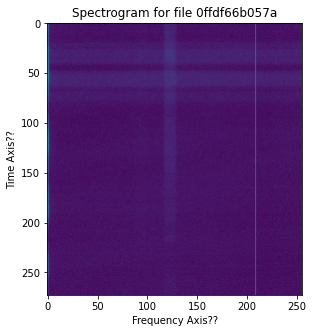

In [40]:
plt.figure(figsize=(5,5))
plt.imshow(data[0].astype(np.float32))
plt.xlabel('Frequency Axis??')
plt.ylabel('Time Axis??')
plt.title('Spectrogram for file 0ffdf66b057a')
plt.show()

In [34]:
273/5

54.6

https://www.kaggle.com/piantic/train-seti-bl-pytorch-starter


https://www.kaggle.com/c/seti-breakthrough-listen/discussion/239245
https://www.kaggle.com/manabendrarout/nfnet-pytorch-starter-lb-0-95

In [16]:
train = pd.read_csv(os.path.join("data","train_labels.csv"))

test = pd.read_csv(os.path.join("data","sample_submission.csv"))

def get_train_file_path(image_id):
    return "data/train/{}/{}.npy".format(image_id[0], image_id)

def get_test_file_path(image_id):
    return "data/test/{}/{}.npy".format(image_id[0], image_id)


train['file_path'] = train['id'].apply(get_train_file_path)
test['file_path'] = test['id'].apply(get_test_file_path)

display(train.head())
display(test.head())

,id,target,file_path
0,00034abb3629,0,data/train/0/00034abb3629.npy
1,0004300a0b9b,0,data/train/0/0004300a0b9b.npy
2,000453852fda,0,data/train/0/000453852fda.npy
3,00047dfc96a9,0,data/train/0/00047dfc96a9.npy
4,0004be0baf70,0,data/train/0/0004be0baf70.npy


,id,target,file_path
0,00034db451c4,0.5,data/test/0/00034db451c4.npy
1,0006316b5ca0,0.5,data/test/0/0006316b5ca0.npy
2,0006a953d21b,0.5,data/test/0/0006a953d21b.npy
3,0008a33d6695,0.5,data/test/0/0008a33d6695.npy
4,00095b5119fc,0.5,data/test/0/00095b5119fc.npy


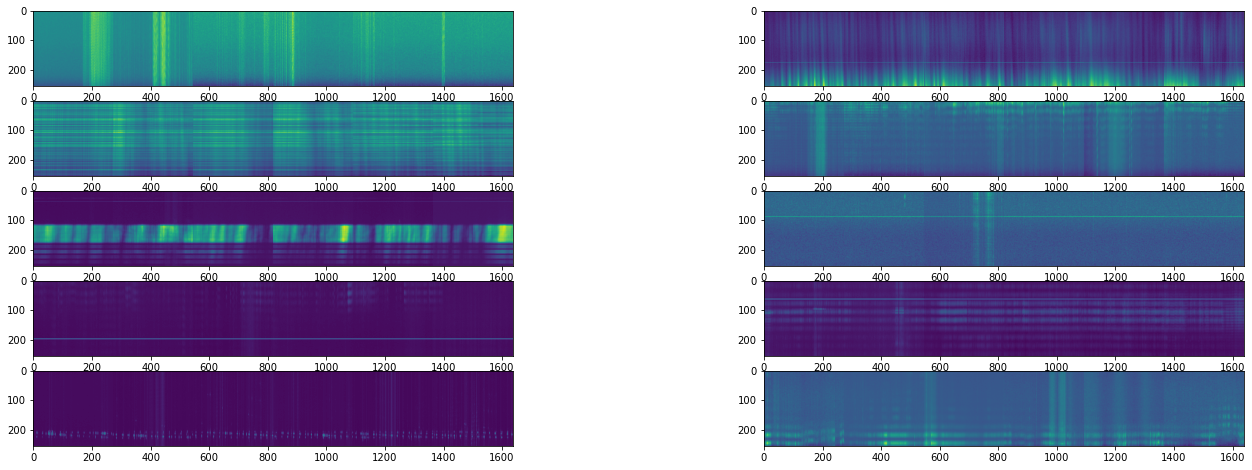

In [17]:
plt.figure(figsize=(24, 8))
for i in range(10):
    image = np.load(train.loc[i, 'file_path']) # (6, 273, 256)
    image = image.astype(np.float32)
    image = np.vstack(image).transpose((1, 0)) # (1638, 256) -> (256, 1638)
    plt.subplot(5, 2, i + 1)
    plt.imshow(image)
plt.show()